In [1]:
!git clone -b week10 https://github.com/vamsigp/EVA5/
%cd EVA5/trainer

Cloning into 'EVA5'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 454 (delta 32), reused 41 (delta 11), pack-reused 379
Receiving objects: 100% (454/454), 47.48 MiB | 36.69 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/EVA5/trainer


In [2]:
!pip install -U albumentations

     |████████████████████████████████| 122kB 4.7MB/s 
     |████████████████████████████████| 952kB 12.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=b1da8091ef88ec2f042ccb44c4dd9388ad49abf28073230e9b9ab2cb914a7b6c
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
%matplotlib inline

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from data_engine import DataEngine
from trainer import Trainer
from results import *
from utils import *

from Albumentations import *
from GradCAM import *

from torch_lr_finder import LRFinder

from models.resnet import ResNet18

from torch.optim.lr_scheduler import ReduceLROnPlateau

In [4]:
transform_album = album_compose()

# View model config
args = ModelConfig(transform_album)
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1,
  'train_transform': <Albumentations.album_compose object at 0x7fa6c4f07f98>}

CUDA Available


In [5]:
data = DataEngine(args)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
device = which_device()

# model = ResNet18().to(device)
# show_model_summary(model, device, (3,32,32))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E+00


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


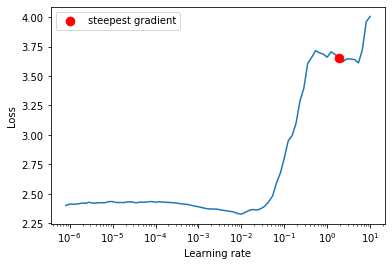

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.52E+00


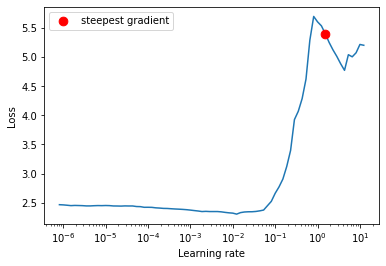

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E+00


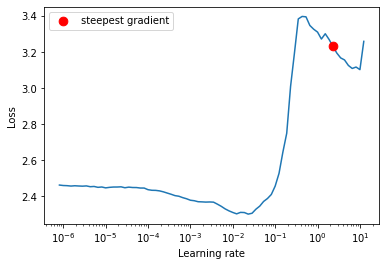

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.23E+00


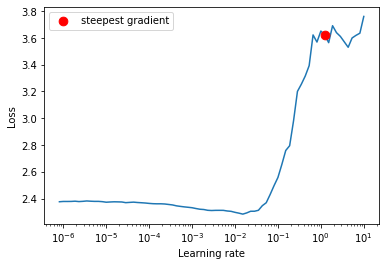

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.85E+00



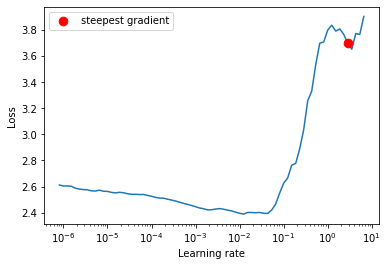

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E+00



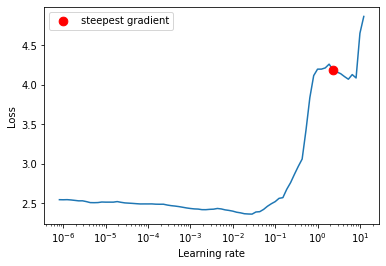

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E+00


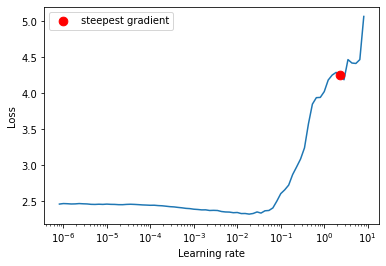

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.52E+00


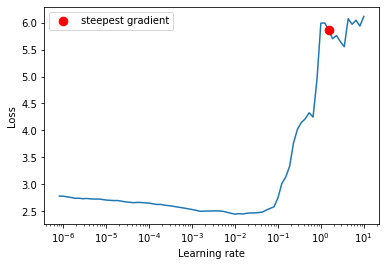

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.51E+00


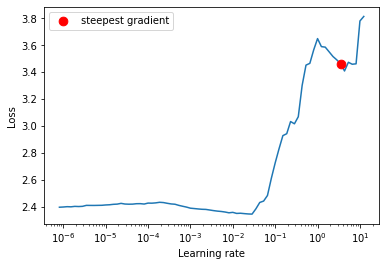

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E+00


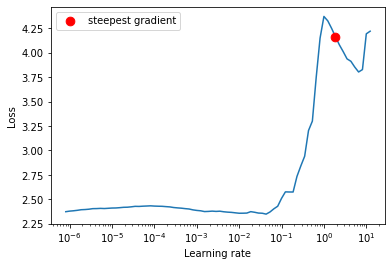

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.52E+01


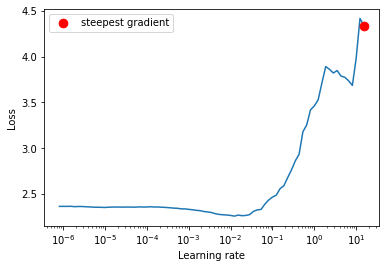

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E+00


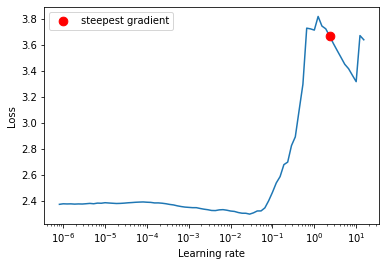

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.52E+00



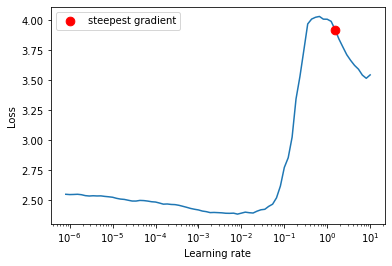

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.33E+00



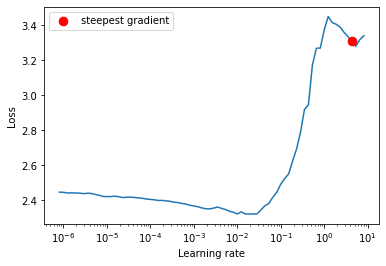

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.34E+00


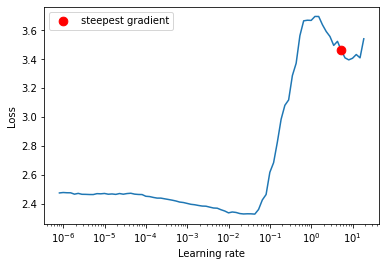

In [7]:
for i in range(1,16):
  model = ResNet18().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9)
  
  lr_finder = LRFinder(model, optimizer, criterion, device=device)
  lr_finder.range_test(data.train_loader, end_lr=100, num_iter=100, step_mode="exp")
  lr_finder.plot()
  lr_finder.reset()



In [8]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR, ReduceLROnPlateau

In [9]:
# resnet_model = ResNet18().to(device)
model = ResNet18().to(device)

In [10]:
# ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=2.85, momentum=0.9)
# scheduler = ReduceLROnPlateau(optimizer=optimizer, mode='min', cooldown=0, patience=3, factor=0.2, min_lr=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
# scheduler = StepLR(optimizer, step_size=8, gamma=0.1)

In [11]:
trainer = Trainer(model, 
                  device,
                  train_loader=data.train_loader, 
                  test_loader = data.test_loader, 
                  optimizer = optimizer, 
                  loss_func = criterion, 
                  lr_scheduler = scheduler) 

In [12]:
(train_loss, train_acc, test_loss, test_acc) = trainer.train_model(epochs=args.epochs, lambda_l1=0.0001)

  0%|          | 0/782 [00:00<?, ?it/s]


Current EPOCH: 0
Learning Rate =  2.85


Train set: Loss=3965.376953125 Batch_id=781 Accuracy=10.55: 100%|██████████| 782/782 [01:06<00:00, 11.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0426, Accuracy: 1143/10000 (11.43%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.04258410131931305

Current EPOCH: 1
Learning Rate =  2.85


Train set: Loss=4584.53515625 Batch_id=781 Accuracy=10.51: 100%|██████████| 782/782 [01:08<00:00, 11.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0437, Accuracy: 996/10000 (9.96%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.043661991500854494

Current EPOCH: 2
Learning Rate =  2.85


Train set: Loss=9553.689453125 Batch_id=781 Accuracy=10.29: 100%|██████████| 782/782 [01:08<00:00, 11.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0404, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.04041438381671906

Current EPOCH: 3
Learning Rate =  2.85


Train set: Loss=9409.0654296875 Batch_id=781 Accuracy=10.06: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 993/10000 (9.93%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03823162870407105

Current EPOCH: 4
Learning Rate =  2.85


Train set: Loss=9830.3505859375 Batch_id=781 Accuracy=10.27: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0374, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03742531516551972

Current EPOCH: 5
Learning Rate =  2.85


Train set: Loss=11006.6005859375 Batch_id=781 Accuracy=10.16: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0415, Accuracy: 1375/10000 (13.75%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.0414677770614624

Current EPOCH: 6
Learning Rate =  2.85


Train set: Loss=10911.2109375 Batch_id=781 Accuracy=10.15: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0384, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03837426042556763

Current EPOCH: 7
Learning Rate =  2.85


Train set: Loss=10834.64453125 Batch_id=781 Accuracy=10.37: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03720834670066833

Current EPOCH: 8
Learning Rate =  2.85


Train set: Loss=10858.1845703125 Batch_id=781 Accuracy=9.95: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0373, Accuracy: 1191/10000 (11.91%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.037341686654090885

Current EPOCH: 9
Learning Rate =  2.85


Train set: Loss=12469.857421875 Batch_id=781 Accuracy=10.33: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 1119/10000 (11.19%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03723450207710266

Current EPOCH: 10
Learning Rate =  2.85


Train set: Loss=12405.6416015625 Batch_id=781 Accuracy=10.21: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0366, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03662601127624512

Current EPOCH: 11
Learning Rate =  2.85


Train set: Loss=14862.9345703125 Batch_id=781 Accuracy=10.18: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0379, Accuracy: 1061/10000 (10.61%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03792464320659637

Current EPOCH: 12
Learning Rate =  2.85


Train set: Loss=14810.9970703125 Batch_id=781 Accuracy=10.36: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0390, Accuracy: 1000/10000 (10.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.0389704993724823

Current EPOCH: 13
Learning Rate =  2.85


Train set: Loss=14839.716796875 Batch_id=781 Accuracy=10.59: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 1019/10000 (10.19%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03715658321380615

Current EPOCH: 14
Learning Rate =  2.85


Train set: Loss=14805.1376953125 Batch_id=781 Accuracy=10.28: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0370, Accuracy: 999/10000 (9.99%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03695702345371246

Current EPOCH: 15
Learning Rate =  0.5700000000000001


Train set: Loss=37552.88671875 Batch_id=781 Accuracy=12.56: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0357, Accuracy: 1457/10000 (14.57%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.035656820464134216

Current EPOCH: 16
Learning Rate =  0.5700000000000001


Train set: Loss=37543.2265625 Batch_id=781 Accuracy=13.81: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 1628/10000 (16.28%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03499363403320312

Current EPOCH: 17
Learning Rate =  0.5700000000000001


Train set: Loss=37533.41796875 Batch_id=781 Accuracy=14.48: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 1937/10000 (19.37%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.034131098890304565

Current EPOCH: 18
Learning Rate =  0.5700000000000001


Train set: Loss=37524.1015625 Batch_id=781 Accuracy=15.09: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 1832/10000 (18.32%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03337112228870392

Current EPOCH: 19
Learning Rate =  0.5700000000000001


Train set: Loss=37515.6328125 Batch_id=781 Accuracy=16.67: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 1681/10000 (16.81%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03666238614320755

Current EPOCH: 20
Learning Rate =  0.5700000000000001


Train set: Loss=37506.72265625 Batch_id=781 Accuracy=17.83: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 2215/10000 (22.15%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.0336557223200798

Current EPOCH: 21
Learning Rate =  0.5700000000000001


Train set: Loss=37497.34375 Batch_id=781 Accuracy=18.49: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 2098/10000 (20.98%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.031421412909030916

Current EPOCH: 22
Learning Rate =  0.5700000000000001


Train set: Loss=37488.703125 Batch_id=781 Accuracy=18.82: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 1912/10000 (19.12%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03342670886516571

Current EPOCH: 23
Learning Rate =  0.5700000000000001


Train set: Loss=37479.96875 Batch_id=781 Accuracy=18.94: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0310, Accuracy: 2049/10000 (20.49%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.031039283621311187

Current EPOCH: 24
Learning Rate =  0.5700000000000001


Train set: Loss=37471.44921875 Batch_id=781 Accuracy=19.20: 100%|██████████| 782/782 [01:10<00:00, 11.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 1600/10000 (16.00%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03620432676076889

Current EPOCH: 25
Learning Rate =  0.5700000000000001


Train set: Loss=37462.51953125 Batch_id=781 Accuracy=18.39: 100%|██████████| 782/782 [01:10<00:00, 11.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0368, Accuracy: 1747/10000 (17.47%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.036824822926521304

Current EPOCH: 26
Learning Rate =  0.5700000000000001


Train set: Loss=37454.4453125 Batch_id=781 Accuracy=18.58: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 1886/10000 (18.86%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03207503530979156

Current EPOCH: 27
Learning Rate =  0.5700000000000001


Train set: Loss=37446.08984375 Batch_id=781 Accuracy=18.62: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 1979/10000 (19.79%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03108906857967377

Current EPOCH: 28
Learning Rate =  0.11400000000000002


Train set: Loss=37443.859375 Batch_id=781 Accuracy=21.33: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.1684, Accuracy: 2431/10000 (24.31%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.1684419182896614

Current EPOCH: 29
Learning Rate =  0.11400000000000002


Train set: Loss=37442.16015625 Batch_id=781 Accuracy=21.77: 100%|██████████| 782/782 [01:10<00:00, 11.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 2263/10000 (22.63%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03024500629901886

Current EPOCH: 30
Learning Rate =  0.11400000000000002


Train set: Loss=37440.80859375 Batch_id=781 Accuracy=22.08: 100%|██████████| 782/782 [01:09<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 2380/10000 (23.80%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029663069152832032

Current EPOCH: 31
Learning Rate =  0.11400000000000002


Train set: Loss=37439.1015625 Batch_id=781 Accuracy=21.93: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 2493/10000 (24.93%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029460035824775695

Current EPOCH: 32
Learning Rate =  0.11400000000000002


Train set: Loss=37437.61328125 Batch_id=781 Accuracy=23.09: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 2513/10000 (25.13%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029489692461490632

Current EPOCH: 33
Learning Rate =  0.11400000000000002


Train set: Loss=37843.02734375 Batch_id=781 Accuracy=20.70: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 2473/10000 (24.73%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.030191144204139708

Current EPOCH: 34
Learning Rate =  0.11400000000000002


Train set: Loss=37841.48046875 Batch_id=781 Accuracy=22.46: 100%|██████████| 782/782 [01:10<00:00, 11.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 2469/10000 (24.69%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.030235999488830566

Current EPOCH: 35
Learning Rate =  0.11400000000000002


Train set: Loss=37839.87109375 Batch_id=781 Accuracy=23.22: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 2690/10000 (26.90%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.030297078001499177

Current EPOCH: 36
Learning Rate =  0.022800000000000004


Train set: Loss=37839.32421875 Batch_id=781 Accuracy=25.44: 100%|██████████| 782/782 [01:09<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 2763/10000 (27.63%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029073967730998993

Current EPOCH: 37
Learning Rate =  0.022800000000000004


Train set: Loss=37839.4609375 Batch_id=781 Accuracy=25.38: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 2688/10000 (26.88%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029318798124790192

Current EPOCH: 38
Learning Rate =  0.022800000000000004


Train set: Loss=37838.83984375 Batch_id=781 Accuracy=25.92: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 2806/10000 (28.06%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.0288479962348938

Current EPOCH: 39
Learning Rate =  0.022800000000000004


Train set: Loss=37838.48828125 Batch_id=781 Accuracy=25.49: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 2666/10000 (26.66%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029157348537445067

Current EPOCH: 40
Learning Rate =  0.022800000000000004


Train set: Loss=37838.3203125 Batch_id=781 Accuracy=25.61: 100%|██████████| 782/782 [01:09<00:00, 11.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 2678/10000 (26.78%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.03119580479860306

Current EPOCH: 41
Learning Rate =  0.022800000000000004


Train set: Loss=37837.921875 Batch_id=781 Accuracy=25.60: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 2644/10000 (26.44%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029151406347751617

Current EPOCH: 42
Learning Rate =  0.022800000000000004


Train set: Loss=37837.46875 Batch_id=781 Accuracy=25.74: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 2712/10000 (27.12%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.028732298493385315

Current EPOCH: 43
Learning Rate =  0.022800000000000004


Train set: Loss=37837.33203125 Batch_id=781 Accuracy=25.57: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 2651/10000 (26.51%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.028592756402492522

Current EPOCH: 44
Learning Rate =  0.022800000000000004


Train set: Loss=37837.1328125 Batch_id=781 Accuracy=25.78: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 2774/10000 (27.74%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.028415236401557922

Current EPOCH: 45
Learning Rate =  0.022800000000000004


Train set: Loss=37836.4453125 Batch_id=781 Accuracy=25.73: 100%|██████████| 782/782 [01:10<00:00, 11.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 2767/10000 (27.67%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.02870587702989578

Current EPOCH: 46
Learning Rate =  0.022800000000000004


Train set: Loss=37836.23046875 Batch_id=781 Accuracy=25.36: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0289, Accuracy: 2747/10000 (27.47%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.02891507909297943

Current EPOCH: 47
Learning Rate =  0.022800000000000004


Train set: Loss=37836.08203125 Batch_id=781 Accuracy=25.81: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 2634/10000 (26.34%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.029134050524234772

Current EPOCH: 48
Learning Rate =  0.022800000000000004


Train set: Loss=37835.50390625 Batch_id=781 Accuracy=25.76: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 2798/10000 (27.98%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.02866447893381119

Current EPOCH: 49
Learning Rate =  0.004560000000000001


Train set: Loss=37835.71484375 Batch_id=781 Accuracy=26.64: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]



Test set: Average loss: 0.0282, Accuracy: 2868/10000 (28.68%)

ReduceLROnPlateau, ReduceLROnPlateau::step(), val_loss 0.028165796315670014


In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')

In [14]:
trainer.classwise_acc(classes)


Accuracy of plane : 59 %
Accuracy of   car : 44 %
Accuracy of  bird : 14 %
Accuracy of   cat :  3 %
Accuracy of  deer : 40 %
Accuracy of   dog : 47 %
Accuracy of  frog : 27 %
Accuracy of horse :  6 %
Accuracy of  ship : 42 %
Accuracy of truck :  9 %



In [15]:
misclassified_imgs = trainer.get_misclassified()

/content/EVA5/trainer/trainer.py:148: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]


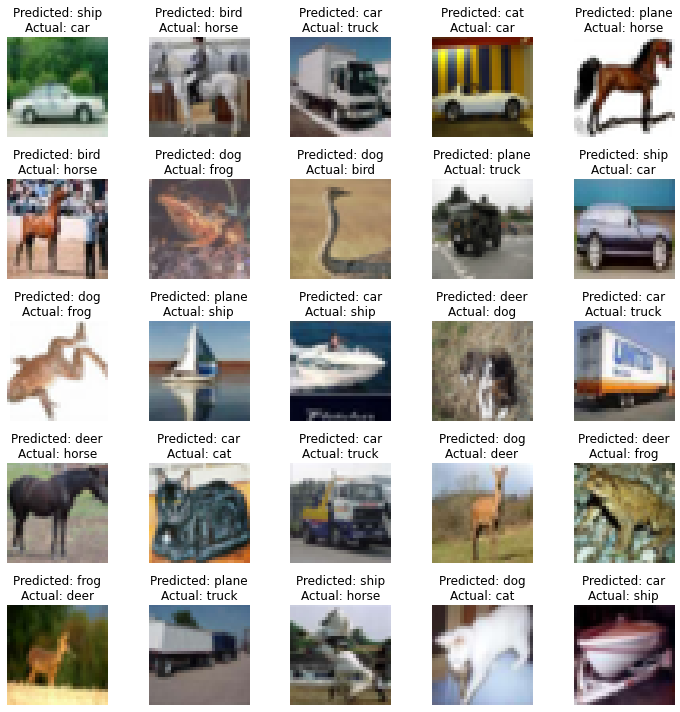

In [16]:
plot_misclassified_images(misclassified_imgs, classes, "misclassified_images1.png")

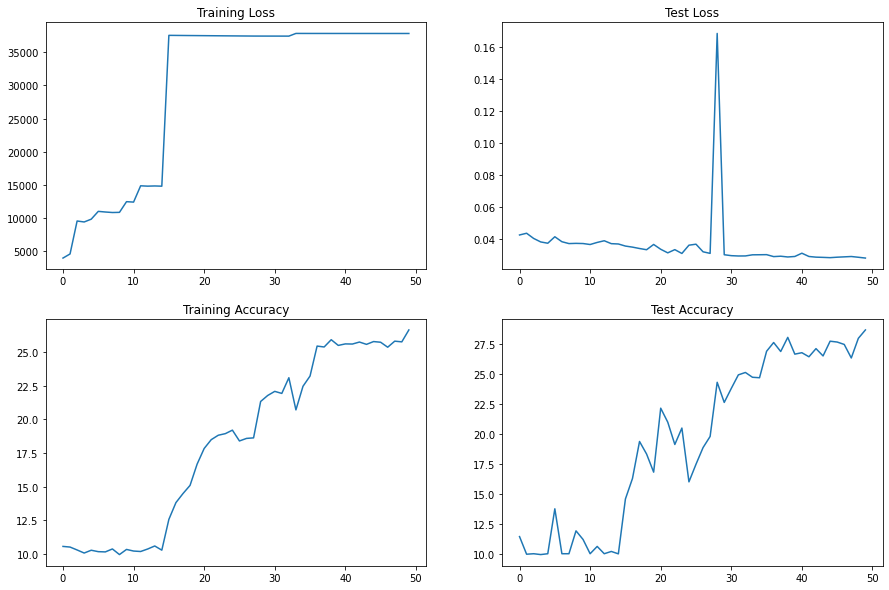

In [17]:
from results import plot_metrics
plot_metrics(train_loss, train_acc, test_loss, test_acc)

In [18]:
dataiter = iter(data.test_loader)
images, labels = dataiter.next()

In [19]:
import PIL
import numpy as np

In [20]:
for name, layer in model.named_modules():
  if isinstance(layer, torch.nn.Conv2d):
    print(name, layer)

conv1 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer1.0.conv1 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer1.0.conv2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer1.1.conv1 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer1.1.conv2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer2.0.conv1 Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
layer2.0.conv2 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer2.0.shortcut.0 Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
layer2.1.conv1 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer2.1.conv2 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer3.0.conv1 Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), 

In [21]:
def plot_images_gradcam(torch_img,normed_torch_img, model):
    images=[]
    g1 = GradCAM(model, model.layer1)
    g2 = GradCAM(model, model.layer2)
    g3 = GradCAM(model, model.layer3)
    g4 = GradCAM(model, model.layer4)
    mask1, _ = g1(normed_torch_img)
    mask2, _ = g2(normed_torch_img)
    mask3, _ = g3(normed_torch_img)
    mask4, _ = g4(normed_torch_img)
    heatmap1, result1 = visualize_cam(mask1, torch_img)
    heatmap2, result2 = visualize_cam(mask2, torch_img)
    heatmap3, result3 = visualize_cam(mask3, torch_img)
    heatmap4, result4 = visualize_cam(mask4, torch_img)

    images.extend([torch_img.cpu(), heatmap1, heatmap2, heatmap3, heatmap4])
    images.extend([torch_img.cpu(), result1, result2, result3, result4])
    grid_image = make_grid(images, nrow=5)
    imshow(grid_image)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


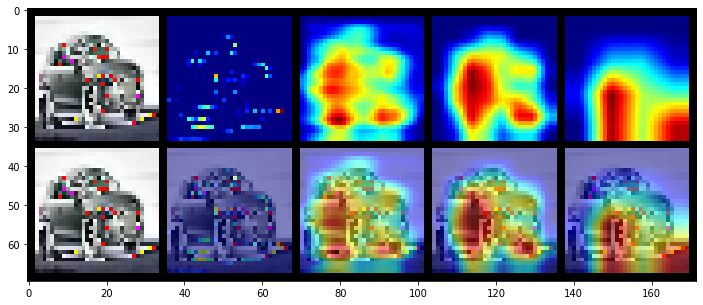

In [22]:
trans = transforms.ToPILImage()
pil_img=trans(torchvision.utils.make_grid(images[1]))
torch_img,normed_torch_img=change(pil_img,device)
plot_images_gradcam(torch_img,normed_torch_img, model)